# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.

https://pandas.pydata.org/pandas-docs/stable/reference/index.html

Total points 6

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
#you may want to import some other modules here such as seaborn or matplotlib

In [2]:
from io import BytesIO
from zipfile import ZipFile
import requests

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [3]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [4]:
zipfile.extractall()

In [5]:
! ls ml-latest-small/

README.txt  links.csv   movies.csv  ratings.csv tags.csv


In [6]:
! head  ./ml-latest-small/movies.csv

**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [7]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')

movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Q1 (.25 point) Check if any of the columns are null

In [8]:
# We can sum up the counts of na's here
movie.isna().sum()


movieId    0
title      0
genres     0
dtype: int64

# Q 2 (.25 point) Check datatype of each of the columns

In [9]:
movie.dtypes
# We can see title has the title and year, and the genre's are broken up by |'s

movieId     int64
title      object
genres     object
dtype: object

# Q3 (.5 point) Using *str* on series genres, build the unique_genre set. It should contain all the unique genres from genres column. Print unique genres too.



In [10]:
print(type(movie['genres'][0]))
print(movie['genres'][0])

# First lets see how we chan break those genres up
print(movie['genres'][0].split('|'))

# lets to that to the entire df
movie['genres'] = movie['genres'].apply(lambda x: x.split("|"))
movie.sample(3)

<class 'str'>
Adventure|Animation|Children|Comedy|Fantasy
['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']


,movieId,title,genres
3177,4280,"World According to Garp, The (1982)","[Comedy, Drama, Romance]"
652,840,House Arrest (1996),"[Children, Comedy]"
2968,3979,Little Nicky (2000),[Comedy]


In [11]:
# Now we can use a set to get the unique genres
unique_genre = set(genre for genres in movie['genres'] for genre in genres)
print(unique_genre)

{'IMAX', 'Musical', '(no genres listed)', 'Children', 'Action', 'Horror', 'Drama', 'Romance', 'Comedy', 'Film-Noir', 'Crime', 'Fantasy', 'Thriller', 'Mystery', 'Animation', 'Sci-Fi', 'Adventure', 'War', 'Documentary', 'Western'}


# Q 4 (1 point) Build columns for different genres with value True or False based on whether a genre is present or not in an observation?



In [12]:
# Lets try with one genre to start and maybe we can move to doing them all at once
def check_genre(genre, col_val):
    if genre in col_val:
        return True
    else:
        return False
movie['IMAX'] = movie['genres'].apply(lambda x: check_genre("IMAX", x))
movie.iloc[3294]


movieId                                4454
title                           More (1998)
genres     [Animation, Drama, Sci-Fi, IMAX]
IMAX                                   True
Name: 3294, dtype: object

In [13]:
# Lets see if we can do it in one go:
for i in unique_genre:
    movie[i] = movie['genres'].apply(lambda x: check_genre(i, x))

movie.sample(7)

,movieId,title,genres,IMAX,Musical,(no genres listed),Children,Action,Horror,Drama,...,Crime,Fantasy,Thriller,Mystery,Animation,Sci-Fi,Adventure,War,Documentary,Western
8042,98361,Byzantium (2012),"[Drama, Fantasy, Thriller]",False,False,False,False,False,False,True,...,False,True,True,False,False,False,False,False,False,False
6989,67186,"Haunting in Connecticut, The (2009)","[Horror, Thriller]",False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
7341,78103,Shake Hands with the Devil (2007),"[Drama, War]",False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
398,457,"Fugitive, The (1993)",[Thriller],False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2222,2951,"Fistful of Dollars, A (Per un pugno di dollari...","[Action, Western]",False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
6061,40732,"Descent, The (2005)","[Adventure, Drama, Horror, Thriller]",False,False,False,False,False,True,True,...,False,False,True,False,False,False,True,False,False,False
3016,4034,Traffic (2000),"[Crime, Drama, Thriller]",False,False,False,False,False,False,True,...,True,False,True,False,False,False,False,False,False,False


# Q5(1 point) Build a "year" column in movie data frame. The title "year" should be included in title column.

Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [14]:
movie['year'] = movie.title.str.extract(r'.*\((\d{4})\)', expand = True)
movie.sample(3)

,movieId,title,genres,IMAX,Musical,(no genres listed),Children,Action,Horror,Drama,...,Fantasy,Thriller,Mystery,Animation,Sci-Fi,Adventure,War,Documentary,Western,year
548,650,Moll Flanders (1996),[Drama],False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,1996
3803,5322,World Traveler (2001),[Drama],False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,2001
5484,26303,Sisters (1973),"[Horror, Thriller]",False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,1973


# Q6.(.5 point) Using seaborn, plot a bar plot of the number of movies per year. Do you see any trend?

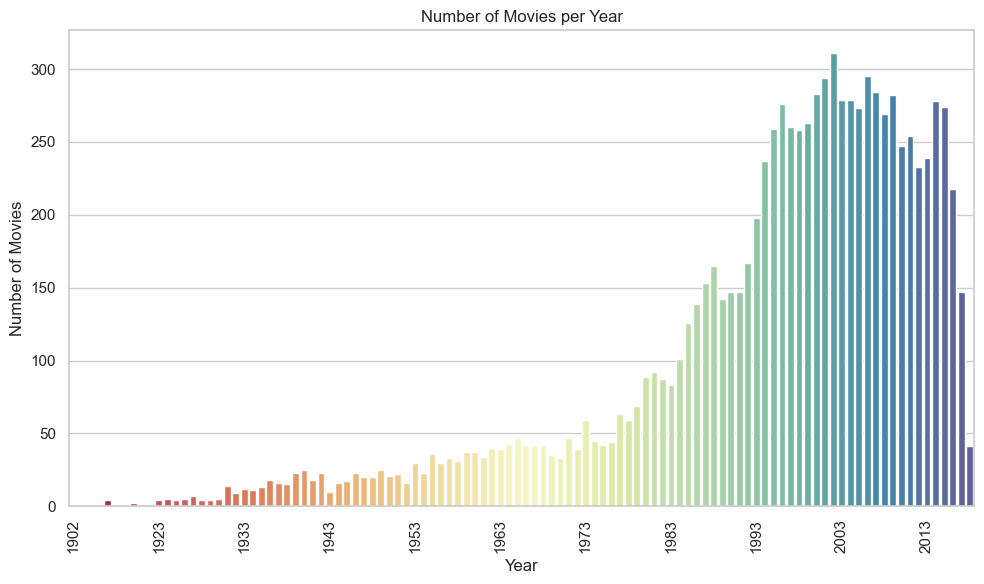

In [15]:
movie_count = movie['year'].value_counts().reset_index().sort_values('year')

#making my seaborn plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='year', y='count', data=movie_count, palette='Spectral')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Year')
plt.xticks(rotation=90)

# The x-ticks were giving me a hard time i found this stackoverflow help:
# https://stackoverflow.com/questions/38947115/how-to-decrease-the-density-of-x-ticks-in-seaborn
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.tight_layout()
plt.show()


# Q7.(1 point) Using matplotlib, plot total number of movies (cumulative over all the years) for each genre.  Your plot should have proper title, axis labels and legends. 

In [16]:
movies_per_genre = movie.iloc[:, 4:-1].cumsum()
print(type(movies_per_genre.iloc[-1]))
totals = movies_per_genre.iloc[-1]


<class 'pandas.core.series.Series'>


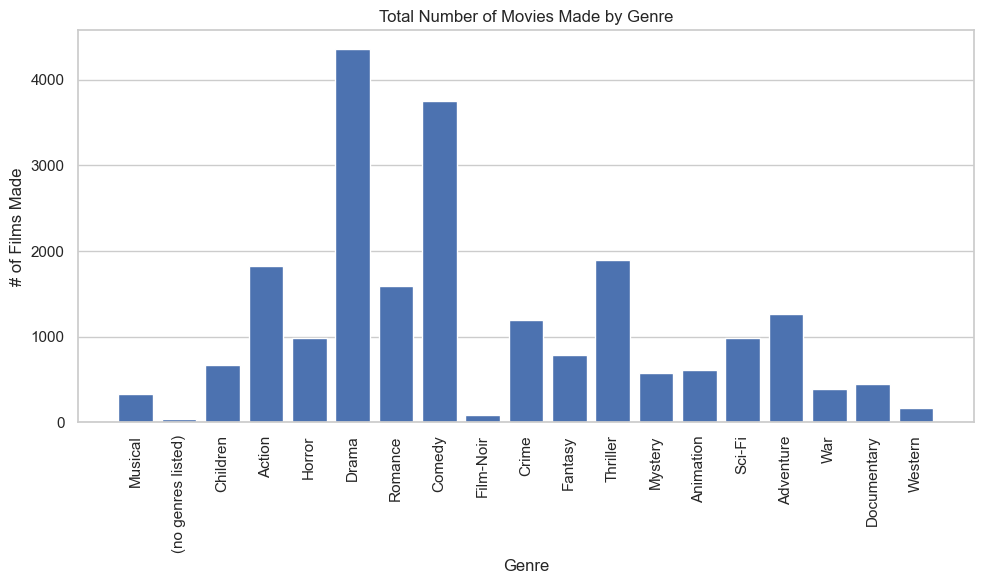

In [17]:
plt.figure(figsize=(10,6))
plt.bar(totals.index, totals.values)
plt.xlabel('Genre')
plt.ylabel('# of Films Made')
plt.title("Total Number of Movies Made by Genre")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.grid(axis='x')
plt.show()

# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie. (It should not contain year). Drop the original *title* columns. Display final movie dataFrame.

In [18]:
movie['title'] = movie['title'].apply(lambda x: re.sub(r"\s*\(\d{4}\)",'', x))
movie.sample(2)

,movieId,title,genres,IMAX,Musical,(no genres listed),Children,Action,Horror,Drama,...,Fantasy,Thriller,Mystery,Animation,Sci-Fi,Adventure,War,Documentary,Western,year
7666,88812,30 Minutes or Less,"[Action, Comedy, Crime]",False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,2011
8751,127390,Family Guy Presents: Blue Harvest,"[Animation, Comedy]",False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,2007


# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the years in different genres. You may choose to make separate plots for each genre or to make a single color coded plot as a function of years. All plots should have proper title, axis labels and legends. Write your observation in no more than 2 lines.

In [19]:
# Lets make a new column with the number of words in the title first
movie['title_words'] = movie['title'].apply(lambda x: len(x.split()))
movie.head(2)

,movieId,title,genres,IMAX,Musical,(no genres listed),Children,Action,Horror,Drama,...,Thriller,Mystery,Animation,Sci-Fi,Adventure,War,Documentary,Western,year,title_words
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,1995,2
1,2,Jumanji,"[Adventure, Children, Fantasy]",False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,1995,1


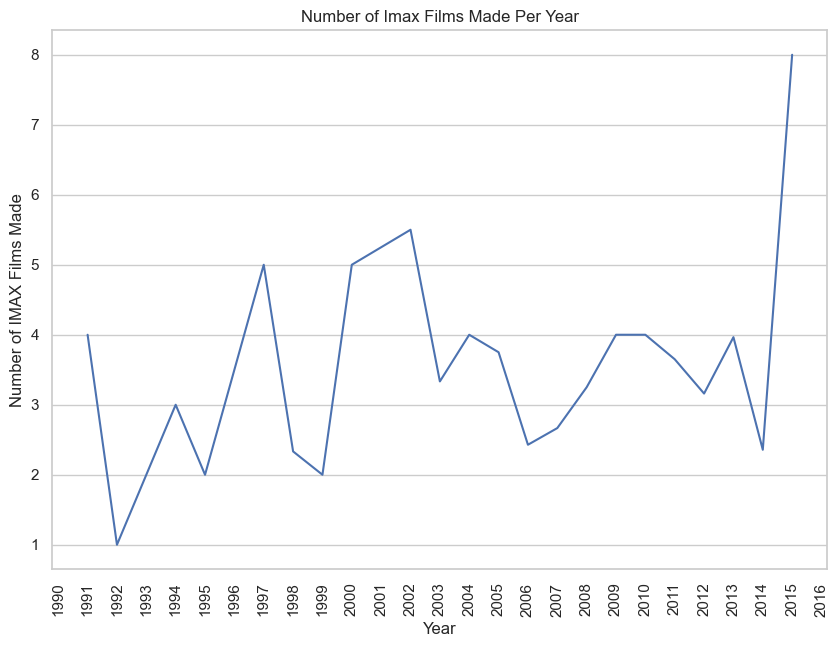

In [40]:
# Now we need to do some grouping first by year
grp_year = movie.groupby(['year'])
# calc the avg for one genre to start
avg_word = grp_year.apply(lambda x: x.groupby('IMAX')['title_words'].mean())
#avg_word
avg_word_per_year = avg_word.unstack()
avg_word_per_year


#make the plot
plt.figure(figsize=(10,7))
sns.lineplot(data=avg_word_per_year, x= 'year', y=True)
plt.xlabel("Year")
plt.ylabel("Number of IMAX Films Made")
plt.title("Number of Imax Films Made Per Year")
plt.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

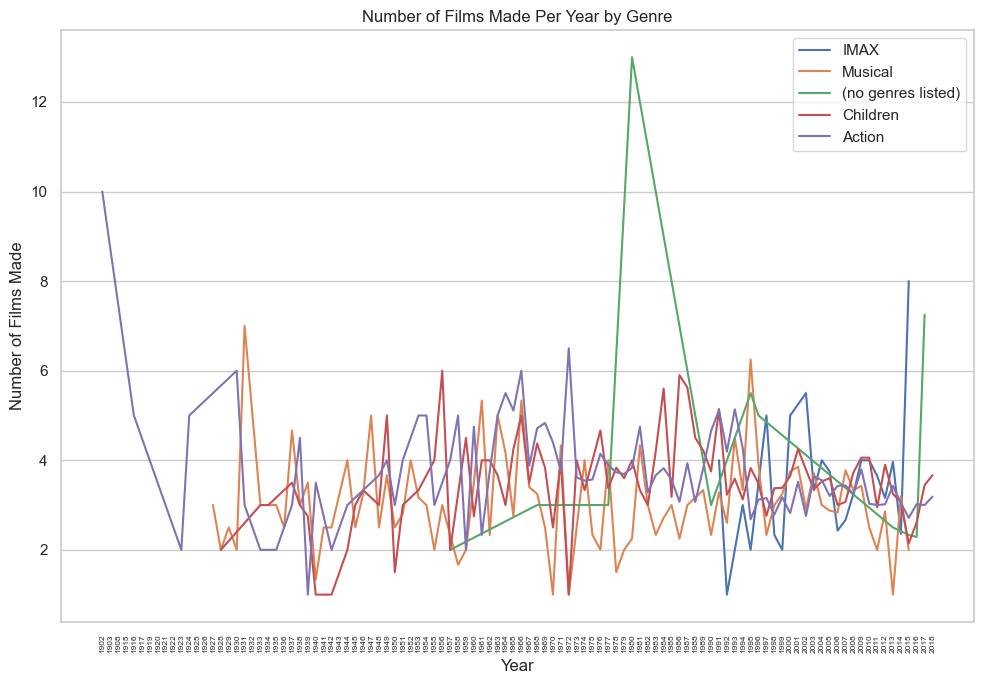

In [31]:
# Okay now trying to do multiple genres, I did them all at once but it was too cluttered So Ill do a few at a time
plt.figure(figsize=(10,7))
grp_year = movie.groupby(['year'])
# calc the avg
for genre in movie.iloc[:,3:8]:
    avg_word = grp_year.apply(lambda x: x.groupby(genre)['title_words'].mean())
#avg_word
    avg_word_per_year = avg_word.unstack()
    sns.lineplot(data=avg_word_per_year, x= 'year', y=True, label = genre)
    
plt.xlabel("Year")
plt.ylabel("Number of Films Made")
plt.title("Number of Films Made Per Year by Genre")
plt.grid(axis='x')
plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

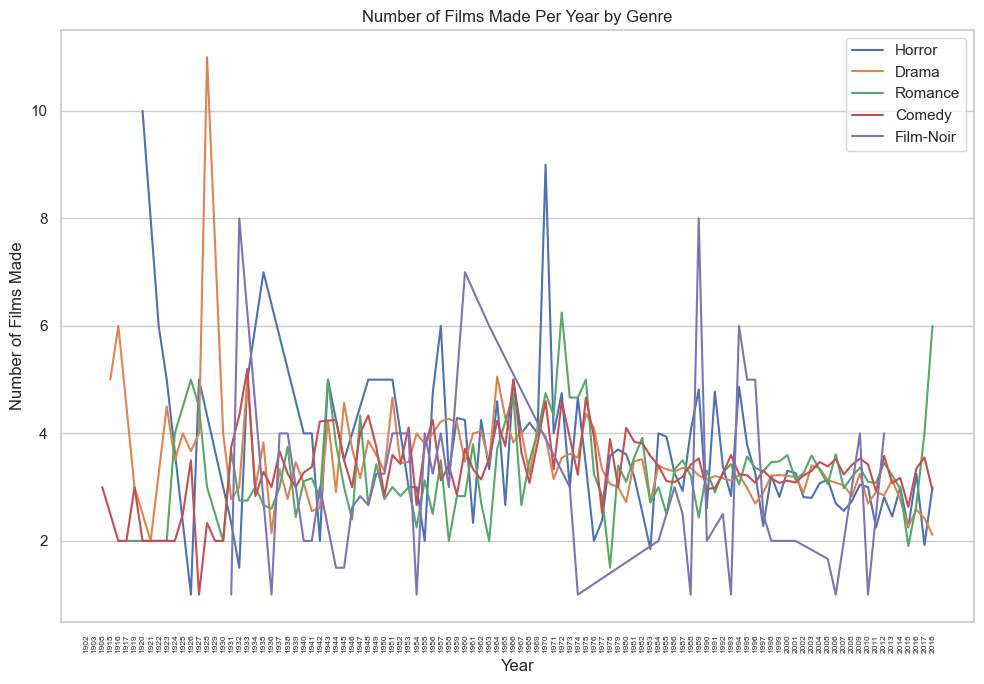

In [32]:
plt.figure(figsize=(10,7))
for genre in movie.iloc[:,8:13]:
    avg_word = grp_year.apply(lambda x: x.groupby(genre)['title_words'].mean())
#avg_word
    avg_word_per_year = avg_word.unstack()
    sns.lineplot(data=avg_word_per_year, x= 'year', y=True, label = genre)
    
plt.xlabel("Year")
plt.ylabel("Number of Films Made")
plt.title("Number of Films Made Per Year by Genre")
plt.grid(axis='x')
plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

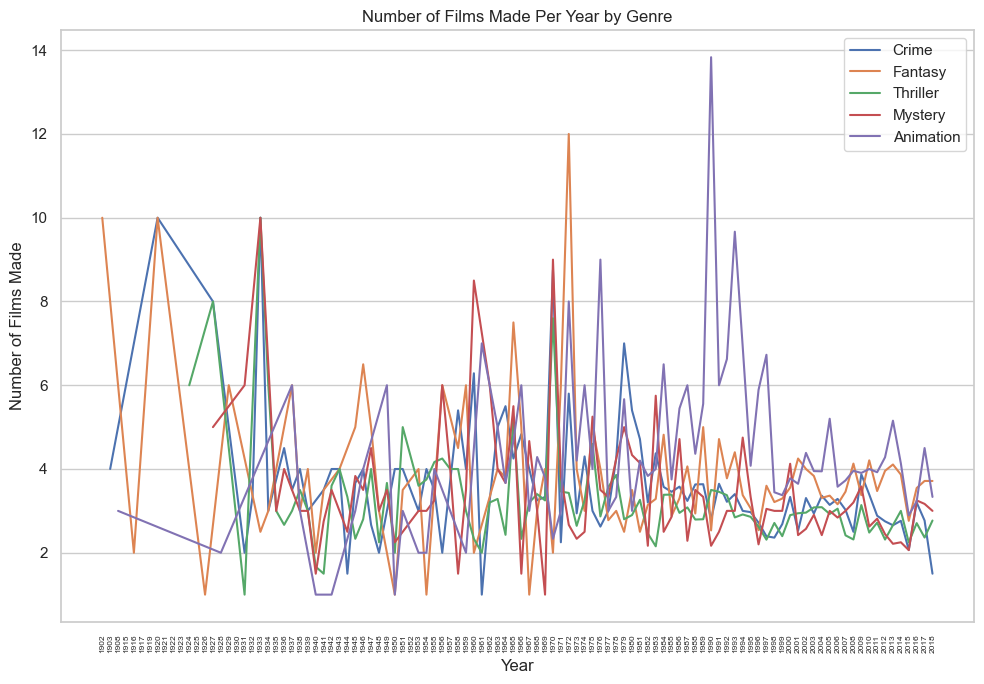

In [33]:
plt.figure(figsize=(10,7))
for genre in movie.iloc[:,13:18]:
    avg_word = grp_year.apply(lambda x: x.groupby(genre)['title_words'].mean())
#avg_word
    avg_word_per_year = avg_word.unstack()
    sns.lineplot(data=avg_word_per_year, x= 'year', y=True, label = genre)
    
plt.xlabel("Year")
plt.ylabel("Number of Films Made")
plt.title("Number of Films Made Per Year by Genre")
plt.grid(axis='x')
plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

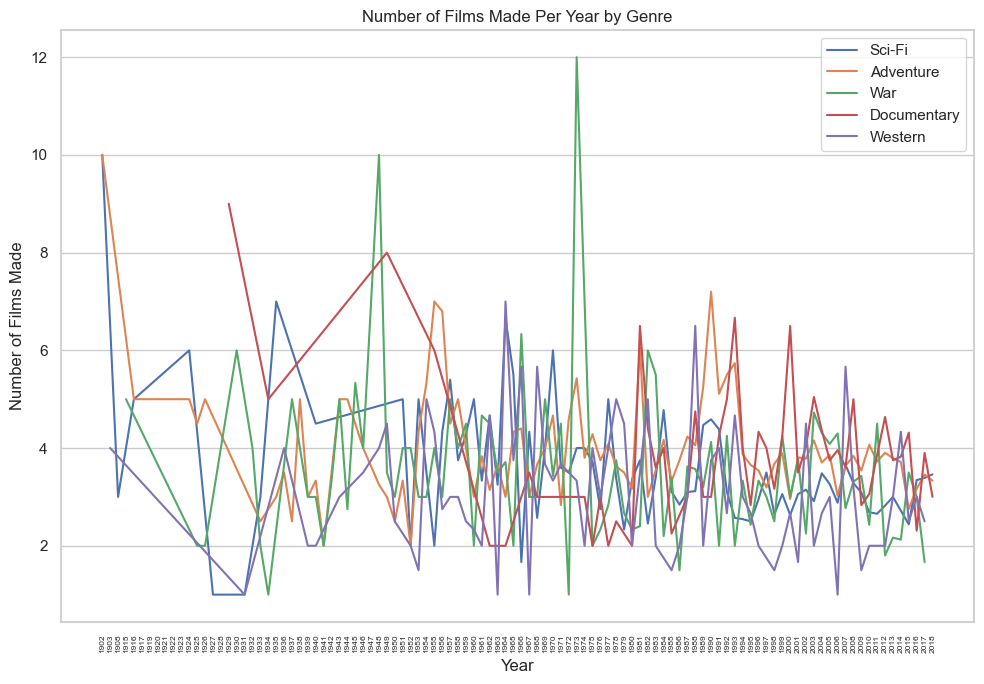

In [39]:
plt.figure(figsize=(10,7))
for genre in movie.iloc[:,18:-2]:
    avg_word = grp_year.apply(lambda x: x.groupby(genre)['title_words'].mean())
#avg_word
    avg_word_per_year = avg_word.unstack()
    sns.lineplot(data=avg_word_per_year, x= 'year', y=True, label = genre)
    
plt.xlabel("Year")
plt.ylabel("Number of Films Made")
plt.title("Number of Films Made Per Year by Genre")
plt.grid(axis='x')
plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

In [ ]:
# I Dont have alot of comments about the plots above.
# It looks like crime really peaked in the early 1990's making ~14 films, most of them vary quite a bit.